# Building the scrapper
Now we will build the scrapper, but before we do, let's do a quick exercise:

**Given our knowledge of the JOGL API, what do we need to build for this scrapper?**

## Anwser
- A class to handle the calls
- Python requests to perform HTTP calls
- A function that handles requests gracefully and resilient to error
- A function that paginates to get all the data
- Helper functions to get the projects, users and members

In [27]:
import requests
from time import sleep
from tqdm.notebook import tqdm

class Scrapper:
    def __init__(self): # What are the parameters
        # Initiliazing our class
        pass
    
    def make_request(self): # What are the parameters
        # This function will handle the request for us
        pass
    
    def paginate(self): # What are the parameters
        # This function will paginage depending on the results
        pass
    
    def get_projects(self):
        # This functions will get the projects on JOGL
        pass
    
    def get_users(self):
        # This function will get the users
        pass
    
    def get_members(self):
        # This function will get the project's members
        pass

In [28]:
class Scrapper:
    def __init__(self, base_url): # What are the parameters
        # Initiliazing our class
        self.base_url = base_url # Here we store the API base url for later use at instanciation time
    ...

In [29]:
class Scrapper:
    ...
    
    def make_request(self, url): # What are the parameters
        # This function will handle the request for us
        handle = requests.get(url) # We get the url 
        return handle # and we return the handle
    ...

In [30]:
class Scrapper:
    ...
    
    def paginate(self, endpoint): # What are the parameters
        # This function will paginage depending on the results
        data = [] # We prepare our storage to keep the information
        url = self.base_url + endpoint # Here we make the url for a given endpoint
        handle = self.make_request(url) # We make the request call
        data += handle.json() # We save the returned JSON results in our data variable
        while handle.headers['Current-Page'] < handle.headers['Total-Pages']: # Then we iterate
            # We do this loop until, the Current-Page is equal to the Total-Pages, which means we got all the data
            # We create the URL for the next page
            url = self.base_url + endpoint + "&page={}".format(int(handle.headers['Current-Page']) + 1)
            handle = self.make_request(url) # We make the request call again
            data += handle.json() # And we add the results to our list
        return data # Then we return the data 
    ...

In [31]:
class Scrapper:
    ...
    
    def get_projects(self):
        # This functions will get the projects on JOGL
        return self.paginate("projects")
    
    def get_users(self):
        # This function will get the users
        return self.paginate("users")
    
    def get_members(self, project_id):
        # This function will get the project's members, we do not paginate, because this functions has no pagination
        # Homework: How do we know that it doesn't paginate?
        url = self.base_url + "projects/{}/members".format(project_id) # We create the URL for the members 
        handle = self.make_request(url) # We make the request
        return handle.json() # And we return the data

In [32]:
class Scrapper:
    ...
    
    def make_request(self, url, retry_count=0): # What are the parameters
        # This function will handle the request for us
        try: # We wrap our handle in a try block
            handle = requests.get(url) # We get the url
            if handle.status_code == 200: # We check that the request was succesful
                return handle # and we return the handle
            else: # Else, we try our request again by returning the function call
                return self.make_request(url, retry_count=retry_count+1) # We add one to the retry count to stop at some point
        except: # If the error is not handled by requests, we retry as well
                return self.make_request(url, retry_count=retry_count+1) # Adding also one to the retry count
    
    ...

In [33]:
class Scrapper:
    def __init__(self, base_url, max_retry=10): # What are the parameters
        # Initiliazing our class
        self.base_url = base_url # Here we store the API base url for later use at instanciation time
        self.max_retry = max_retry # We store the max retry at init time
    
    def make_request(self, url, retry_count=0): # What are the parameters
        # This function will handle the request for us
        if retry_count >= self.max_retry: # If we have reached the max_retry then we return None
            print("The request for URL: {} has reached the max_retry={} and failed!!!".format(url, self.max_retry))
            return None 
        sleep(retry_count) # We also are trying to be nice to the servers, so we will wait X=retry_count seconds before trying again 
        try: # We wrap our handle in a try block
            handle = requests.get(url) # We get the url
            if handle.status_code == 200: # We check that the request was succesful
                return handle # and we return the handle
            else: # Else, we try our request again by returning the function call
                return self.make_request(url, retry_count=retry_count+1) # We add one to the retry count to stop at some point
        except: # If the error is not handled by requests, we retry as well
                return self.make_request(url, retry_count=retry_count+1) # Adding also one to the retry count
    
    def paginate(self, endpoint): # What are the parameters
        # This function will paginage depending on the results
        data = [] # We prepare our storage to keep the information
        url = self.base_url + endpoint # Here we make the url for a given endpoint
        handle = self.make_request(url) # We make the request call
        if handle: # If our call failed
            data += handle.json() # We save the returned JSON results in our data variable
        while int(handle.headers['Current-Page']) < int(handle.headers['Total-Pages']): # Then we iterate
            # We do this loop until, the Current-Page is equal to the Total-Pages, which means we got all the data
            # We create the URL for the next page
            url = self.base_url + endpoint + "?page={}".format(int(handle.headers['Current-Page']) + 1)
            handle = self.make_request(url) # We make the request call again
            if handle:
                data += handle.json() # And we add the results to our list
        return data # Then we return the data 
    
    ...

In [ ]:
class Scrapper:
    ...
        
    def paginate(self, endpoint): # What are the parameters
        # This function will paginage depending on the results
        pbar = tqdm(total=100) # We create a progress bar
        data = [] # We prepare our storage to keep the information
        url = self.base_url + endpoint # Here we make the url for a given endpoint
        handle = self.make_request(url) # We make the request call
        if handle: # If our call failed
            pbar.total = int(handle.headers['Total-Pages']) # We update the progress bar
            data += handle.json() # We save the returned JSON results in our data variable
        pbar.update(1) # we add one because we already started one
        while int(handle.headers['Current-Page']) < int(handle.headers['Total-Pages']): # Then we iterate
            # We do this loop until, the Current-Page is equal to the Total-Pages, which means we got all the data
            # We create the URL for the next page
            url = self.base_url + endpoint + "?page={}".format(int(handle.headers['Current-Page']) + 1)
            handle = self.make_request(url) # We make the request call again
            if handle:
                data += handle.json() # And we add the results to our list
                pbar.update(1) # We update each step
        pbar.close() # then we close it when its finished
        return data # Then we return the data 
    
    ...

In [87]:
import requests
from time import sleep
from tqdm.notebook import tqdm

class Scrapper:
    def __init__(self, base_url, max_retry=10): # What are the parameters
        # Initiliazing our class
        self.base_url = base_url # Here we store the API base url for later use at instanciation time
        self.max_retry = max_retry # We store the max retry at init time
    
    def make_request(self, url, retry_count=0): # What are the parameters
        # This function will handle the request for us
        if retry_count >= self.max_retry: # If we have reached the max_retry then we return None
            print("The request for URL: {} has reached the max_retry={} and failed!!!".format(url, self.max_retry))
            return None 
        sleep(retry_count) # We also are trying to be nice to the servers, so we will wait X=retry_count seconds before trying again 
        try: # We wrap our handle in a try block
            handle = requests.get(url) # We get the url
            if handle.status_code == 200: # We check that the request was succesful
                return handle # and we return the handle
            else: # Else, we try our request again by returning the function call
                return self.make_request(url, retry_count=retry_count+1) # We add one to the retry count to stop at some point
        except: # If the error is not handled by requests, we retry as well
                return self.make_request(url, retry_count=retry_count+1) # Adding also one to the retry count
    
    def paginate(self, endpoint, max_items=100): # What are the parameters
        # This function will paginage depending on the results
        data = [] # We prepare our storage to keep the information
        url = self.base_url + endpoint + "?page=1&items={}".format(max_items) # Here we make the url for a given endpoint
        handle = self.make_request(url) # We make the request call
        if handle: # If our call failed
            data += handle.json() # We save the returned JSON results in our data variable
            pbar = tqdm(total=int(handle.headers['Total-Pages'])) # We create a progress bar
        pbar.update(1) # we add one because we already started one
        while int(handle.headers['Current-Page']) < int(handle.headers['Total-Pages']): # Then we iterate
            # We do this loop until, the Current-Page is equal to the Total-Pages, which means we got all the data
            # We create the URL for the next page
            url = self.base_url + endpoint + "?page={}&items={}".format(int(handle.headers['Current-Page']) + 1, max_items)
            handle = self.make_request(url) # We make the request call again
            if handle:
                data += handle.json() # And we add the results to our list
            pbar.update(1) # We update each step
        pbar.close() # then we close it when its finished
        return data # Then we return the data 
    
    def get_projects(self):
        # This functions will get the projects on JOGL
        return self.paginate("projects")
    
    def get_users(self):
        # This function will get the users
        return self.paginate("users")
    
    def get_members(self, project_id):
        # This function will get the project's members, we do not paginate, because this functions has no pagination
        # Homework: How do we know that it doesn't paginate?
        url = self.base_url + "projects/{}/members".format(project_id) # We create the URL for the members 
        handle = self.make_request(url) # We make the request
        return handle.json() # And we return the data

In [190]:
scrapper = Scrapper("https://jogl-backend.herokuapp.com/api/")

In [191]:
projects = scrapper.get_projects()

  0%|          | 0/5 [00:00<?, ?it/s]

In [192]:
users = scrapper.get_users()

  0%|          | 0/69 [00:00<?, ?it/s]

In [193]:
members = {}
for project in tqdm(projects):
    members[project['id']] = scrapper.get_members(project['id'])

  0%|          | 0/467 [00:00<?, ?it/s]

# Understanding the JSON objects: Reverse engineer the data
## Project
If we look at a project object, here is the general structure:
```json
{'id': 1,
 'address': None,
 'affiliated_spaces': [],
 'badges': [],
 'banner_url_sm': 'https://jogl-backend.herokuapp.com/rails/active_storage/representations/redirect/eyJfcmFpbHMiOnsibWVzc2FnZSI6IkJBaHBJQT09IiwiZXhwIjpudWxsLCJwdXIiOiJibG9iX2lkIn19--5956b59a00e06a36f4d941067a1a5f5bb3201162/eyJfcmFpbHMiOnsibWVzc2FnZSI6IkJBaDdCem9MWm05eWJXRjBTU0lJYW5CbkJqb0dSVlE2QzNKbGMybDZaVWtpRFRFd01IZ3hNREJlQmpzR1ZBPT0iLCJleHAiOm51bGwsInB1ciI6InZhcmlhdGlvbiJ9fQ==--822a4f71c65d966b96d9c432fdcd9fd858ca7621/Planete%20JOGL_9.jpg',
 'banner_url': 'https://jogl-backend.herokuapp.com/rails/active_storage/representations/redirect/eyJfcmFpbHMiOnsibWVzc2FnZSI6IkJBaHBJQT09IiwiZXhwIjpudWxsLCJwdXIiOiJibG9iX2lkIn19--5956b59a00e06a36f4d941067a1a5f5bb3201162/eyJfcmFpbHMiOnsibWVzc2FnZSI6IkJBaDdCem9MWm05eWJXRjBTU0lJYW5CbkJqb0dSVlE2QzNKbGMybDZaVWtpRFRRd01IZzBNREJlQmpzR1ZBPT0iLCJleHAiOm51bGwsInB1ciI6InZhcmlhdGlvbiJ9fQ==--ccc1bcb51ee49a574cc3eb6ec6a7b62e8b79213b/Planete%20JOGL_9.jpg',
 'challenges': [],
 'city': None,
 'country': None,
 'created_at': None,
 'creator': {'id': 1,
  'first_name': 'Leo',
  'last_name': 'Blondel',
  'logo_url': 'https://jogl-backend.herokuapp.com/rails/active_storage/representations/redirect/eyJfcmFpbHMiOnsibWVzc2FnZSI6IkJBaHBLQT09IiwiZXhwIjpudWxsLCJwdXIiOiJibG9iX2lkIn19--671767c7b111556659afd2b2697368bcd112a3ab/eyJfcmFpbHMiOnsibWVzc2FnZSI6IkJBaDdCem9MWm05eWJXRjBTU0lJYW5CbkJqb0dSVlE2QzNKbGMybDZaVWtpQ3pnd2VEZ3dYZ1k3QmxRPSIsImV4cCI6bnVsbCwicHVyIjoidmFyaWF0aW9uIn19--a1aabdcb9617de1746938007537b8a3bfb475ad9/team-leo-blondel.jpg',
  'logo_url_sm': 'https://jogl-backend.herokuapp.com/rails/active_storage/representations/redirect/eyJfcmFpbHMiOnsibWVzc2FnZSI6IkJBaHBLQT09IiwiZXhwIjpudWxsLCJwdXIiOiJibG9iX2lkIn19--671767c7b111556659afd2b2697368bcd112a3ab/eyJfcmFpbHMiOnsibWVzc2FnZSI6IkJBaDdCem9MWm05eWJXRjBTU0lJYW5CbkJqb0dSVlE2QzNKbGMybDZaVWtpQ3pRd2VEUXdYZ1k3QmxRPSIsImV4cCI6bnVsbCwicHVyIjoidmFyaWF0aW9uIn19--c95b45ffd900c6100d86c347f273b9202df8f78c/team-leo-blondel.jpg',
  'short_bio': 'CTO of JOGL and researcher in Computational Biology'},
 'feed_id': 2,
 'followers_count': 53,
 'geoloc': {'lat': 38.7586749494603, 'lng': -42.8155313163615},
 'grant_info': None,
 'interests': [9, 17],
 'is_looking_for_collaborators': True,
 'is_private': False,
 'is_reviewed': False,
 'maturity': 'demonstrated_impact',
 'members_count': 42,
 'needs_count': 0,
 'posts_count': 30,
 'programs': [],
 'relation': None,
 'reviews_count': 0,
 'saves_count': 4,
 'short_description': 'This is JOGL on JOGL.',
 'short_title': 'JOGL',
 'skills': ['react',
  'collaboration',
  'open science',
  'ruby on rails',
  'ux-design',
  'ui-design',
  'algolia'],
 'status': 'active',
 'title': 'JOGLmeta',
 'updated_at': '2021-01-13T01:50:12.317Z',
 'users_sm': [...,
      {'id': 1,
       'first_name': 'Leo',
       'last_name': 'Blondel',
       'short_bio': 'CTO of JOGL and researcher in Computational Biology',
       'owner': True,
       'admin': True,
       'member': True,
       'logo_url': 'https://jogl-backend.herokuapp.com/rails/active_storage/representations/redirect/eyJfcmFpbHMiOnsibWVzc2FnZSI6IkJBaHBLQT09IiwiZXhwIjpudWxsLCJwdXIiOiJibG9iX2lkIn19--671767c7b111556659afd2b2697368bcd112a3ab/eyJfcmFpbHMiOnsibWVzc2FnZSI6IkJBaDdCem9MWm05eWJXRjBTU0lJYW5CbkJqb0dSVlE2QzNKbGMybDZaVWtpQ3pRd2VEUXdYZ1k3QmxRPSIsImV4cCI6bnVsbCwicHVyIjoidmFyaWF0aW9uIn19--c95b45ffd900c6100d86c347f273b9202df8f78c/team-leo-blondel.jpg'},
       ...
  ],
 'has_followed': False,
 'has_saved': False,
 'is_admin': False,
 'is_member': False,
 'is_owner': False,
 'is_pending': False,
 'is_reviewer': False}
 ```

We can simplify it into a set of root keys with: `project.keys()`
```
['id', 'address', 'affiliated_spaces', 'badges', 'banner_url_sm', 'banner_url', 'challenges', 'city', 'country', 'created_at', 'creator', 'feed_id', 'followers_count', 'geoloc', 'grant_info', 'interests', 'is_looking_for_collaborators', 'is_private', 'is_reviewed', 'maturity', 'members_count', 'needs_count', 'posts_count', 'programs', 'relation', 'reviews_count', 'saves_count', 'short_description', 'short_title', 'skills', 'status', 'title', 'updated_at', 'users_sm', 'has_followed', 'has_saved', 'is_admin', 'is_member', 'is_owner', 'is_pending', 'is_reviewer']
```

Most of those are self explanatory and contain a value, such as `title` or `creator`. Other are internal to the platform and represent either relationships, or directly display the item related to a project. Those are for example, `members` or `challenges`. 

Understanding the data structure, and the relations between the objects is quintessential in data scrapping. Take the time to deeply understand how everything fits together so that you avoid making wrong assumptions that can lead to mistake in the interpretation and/or the scrapping itself.

## User
Inside the project item, we can find an `members` tag. This is an array of objects, which shows that this is very likely a relationship in the database. Well, we already know that there is a User endpoint because we scrapped the data, so let's look at a user data model: 

```json
{'active_status': 'active',
 'affiliation': 'Unicamp',
 'badges': [],
 'bio': None,
 'can_contact': None,
 'category': None,
 'city': 'Sao Paulo',
 'confirmed_at': '2021-10-02T18:11:04.864Z',
 'country': 'Brazil',
 'current_sign_in_at': '2021-10-02T19:42:10.203Z',
 'feed_id': 9001,
 'first_name': 'Esther Leandra',
 'id': 8058,
 'interests': [2, 13, 14, 15, 17],
 'last_name': 'Palmeira Barros',
 'logo_url_sm': 'https://jogl-backend.herokuapp.com/assets/default-user-5-8a5c89d882fc5c8de164895a10f0f0fbb1c7ff2e72874bab80b000f0309dd545.png',
 'logo_url': 'https://jogl-backend.herokuapp.com/assets/default-user-5-8a5c89d882fc5c8de164895a10f0f0fbb1c7ff2e72874bab80b000f0309dd545.png',
 'mail_newsletter': True,
 'mail_weekly': None,
 'nickname': 'EstherPalmeira',
 'relation': None,
 'ressources': [],
 'short_bio': 'I am a food engineering student at unicamp',
 'skills': ['Student motivation', 'Ciência da informação'],
 'stats': {'saves_count': 0,
  'claps_count': 0,
  'followers_count': 2,
  'following_count': 0,
  'mutual_count': 0,
  'projects_count': 1,
  'needs_count': 0,
  'workgroups_count': 0,
  'challenges_count': 1,
  'programs_count': 0,
  'spaces_count': 0,
  'reviews_count': 0},
 'status': 'online',
 'geoloc': {'lat': -23.5506507, 'lng': -46.6333824},
 'has_clapped': False,
 'has_followed': False,
 'has_saved': False,
 'is_admin': False,
 'is_reviewer': False}
 ```
 
And its keys: 
```
['active_status', 'affiliation', 'badges', 'bio', 'can_contact', 'category', 'city', 'confirmed_at', 'country', 'current_sign_in_at', 'feed_id', 'first_name', 'id', 'interests', 'last_name', 'logo_url_sm', 'logo_url', 'mail_newsletter', 'mail_weekly', 'nickname', 'relation', 'ressources', 'short_bio', 'skills', 'stats', 'status', 'geoloc', 'has_clapped', 'has_followed', 'has_saved', 'is_admin', 'is_reviewer']
```

## Members
Using the members route, we are getting the members of a project, let's look at this object:

```json
[
  {'id': 5469,
   'first_name': 'Ayesha',
   'last_name': 'Kawser ',
   'nickname': 'Ayesha',
   'status': 'online',
   'skills': ['Research proposal', 'Python'],
   'ressources': [],
   'interests': [1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13],
   'can_contact': None,
   'current_sign_in_at': '2022-01-10T13:36:55.650Z',
   'logo_url': 'https://jogl-backend.herokuapp.com/assets/default-user-6-4c06e6d9d3dd832451c36ca92f0adba00b52f7f40d308ce850cbc81afb34ab0e.png',
   'logo_url_sm': 'https://jogl-backend.herokuapp.com/assets/default-user-6-4c06e6d9d3dd832451c36ca92f0adba00b52f7f40d308ce850cbc81afb34ab0e.png',
   'short_bio': 'Looking for research project related to computational biology/ bioinformatics and data science',
   'owner': False,
   'admin': False,
   'member': True,
   'affiliation': 'N/A',
   'reviewer': False,
   'pending': False,
   'has_followed': False,
   'has_clapped': False,
   'has_saved': False,
   'geoloc': {'lat': 43.7298, 'lng': -79.2639},
   'stats': {'mutual_count': 0,
    'followers_count': 2,
    'projects_count': 3,
    'spaces_count': 0}},
    ...
    ]
 ```
 
It is a list of members, as a user model, but it does not have all the fields of a user model. This is important because sometime we might think that is is enough to grab the data from a secondary endpoint (like members), but actually, we need to get the primary data from the source. 

## Others
There are plenty more to be scrapped and analyze, and you are most welcome to modify this code to go and explore further the data that you can find on the website of the JOGL.

# Tidying up the data
Now that we have harvested the raw data, we need to construct tables containing useful informations, and allowing us to analyze easily the data. This means we need to follow tidy data principles of organization. But, you might ask "Doesn't pandas has a `from_dict` function? So we can just use this to create a table no?"  

In [196]:
import pandas as pd
tqdm.pandas()

In [97]:
pd.DataFrame.from_dict(projects).head()

,id,address,affiliated_spaces,badges,banner_url_sm,banner_url,challenges,city,country,created_at,...,title,updated_at,users_sm,has_followed,has_saved,is_admin,is_member,is_owner,is_pending,is_reviewer
0,1,None,[],[],https://jogl-backend.herokuapp.com/rails/activ...,https://jogl-backend.herokuapp.com/rails/activ...,[],None,None,None,...,JOGLmeta,2021-01-13T01:50:12.317Z,"[{'id': 3, 'first_name': 'Thomas', 'last_name'...",False,False,False,False,False,False,False
1,2,None,[],[],https://jogl-backend.herokuapp.com/rails/activ...,https://jogl-backend.herokuapp.com/rails/activ...,[],None,None,None,...,Expédition Sagesse - A Wisdom Journey,2020-04-17T17:27:23.259Z,"[{'id': 6, 'first_name': 'Pleen ', 'last_name'...",False,False,False,False,False,False,False
2,3,None,[],[],https://jogl-backend.herokuapp.com/rails/activ...,https://jogl-backend.herokuapp.com/rails/activ...,[],None,None,None,...,Containerlab,2020-04-17T17:27:23.310Z,"[{'id': 13, 'first_name': 'Anna', 'last_name':...",False,False,False,False,False,False,False
3,4,None,[],[],https://jogl-backend.herokuapp.com/rails/activ...,https://jogl-backend.herokuapp.com/rails/activ...,[],None,None,None,...,Robot Missions,2020-04-17T17:27:22.912Z,"[{'id': 12, 'first_name': 'Erin', 'last_name':...",False,False,False,False,False,False,False
4,5,None,[],[],https://jogl-backend.herokuapp.com/rails/activ...,https://jogl-backend.herokuapp.com/rails/activ...,[],None,None,None,...,Project: Ikigai,2020-04-17T17:27:22.015Z,"[{'id': 18, 'first_name': 'Pascal ', 'last_nam...",False,False,False,False,False,False,False


As you can see, it works fine, EXCEPT that it does not follow the tidy data principles of not having multidimentional elements. If we try to apply `count` or other methods it will fail on all the arrays. Therefore we must reorganize our data. 
## Data tables
We are going to create three tables to store our data:
 1) Projects
 2) Users
 3) Members

We are going to create them as we read the data, and we are going to use the dictionaries so its easier to read. This step is also a way for us to select what is actually interesting as, most often, all of the data is not interesting. 


## Key Concept: Join Table
As you will see just below we are going to utilize a key concept called join table, this will allow us to save on data space by avoiding data duplication. Its a bit more advanced than just TidyData, but it is an important concept for handling tabular data. A join is an action which takes two tables, and merges the information, row by row, depending on a merge column. Let's take an example:
```
Table A
id data

Table B
id data

Join Table
id_A id_B
```

Here, A is an object which can hold multiple object of type B. For example, A is a Player, and B are pokemons, A can hold many pokemons. So to save this relationship, we use the join table, which maps A -> Bs. If we want to access the information of what pokemon are in a player A, we can then ask for a join: `Join(A, B, through="Join Table")`. This will return a table of the form:
```
New Table
id_A data_A id_B data_B
```
Ok, code is better than words so let's see a simple example before we apply it to our data.

In [98]:
# Example of a join in pandas
players = [
    ["id", "player_name"],
    [1, "Josh"],
    [2, "Mary"],
    [3, "Charlie"]
]
pokemons = [
    ['id', 'pokemon_name', 'pokemon_type'],
    [1, "Pikatchu", "Electric"],
    [2, "Charizard", "Fire"],
    [3, "Mew", "Psychic"],
    [4, "Dracoflame", "Fire"]
]
join_table = [
    ['player_id', 'pokemon_id'],
    [1, 1],
    [1, 3],
    [2, 2],
    [2, 3],
]
df_players = pd.DataFrame(players[1:], columns=players[0])
df_pokemons = pd.DataFrame(pokemons[1:], columns=pokemons[0])
df_join_table = pd.DataFrame(join_table[1:], columns=join_table[0])

In [99]:
df_players

,id,player_name
0,1,Josh
1,2,Mary
2,3,Charlie


In [100]:
df_players.merge(df_join_table, left_on="id", right_on="player_id")

,id,player_name,player_id,pokemon_id
0,1,Josh,1,1
1,1,Josh,1,3
2,2,Mary,2,2
3,2,Mary,2,3


In [101]:
df_players.merge(df_join_table, left_on="id", right_on="player_id").merge(df_pokemons, left_on="pokemon_id", right_on="id")

,id_x,player_name,player_id,pokemon_id,id_y,pokemon_name,pokemon_type
0,1,Josh,1,1,1,Pikatchu,Electric
1,1,Josh,1,3,3,Mew,Psychic
2,2,Mary,2,3,3,Mew,Psychic
3,2,Mary,2,2,2,Charizard,Fire


In [102]:
df_players.merge(df_join_table, 
                 left_on="id", 
                 right_on="player_id"
         ).merge(df_pokemons, 
                 left_on="pokemon_id", 
                 right_on="id"
         )[['player_id', 'player_name', 'pokemon_id', 'pokemon_name', 'pokemon_type']]

,player_id,player_name,pokemon_id,pokemon_name,pokemon_type
0,1,Josh,1,Pikatchu,Electric
1,1,Josh,3,Mew,Psychic
2,2,Mary,3,Mew,Psychic
3,2,Mary,2,Charizard,Fire


Using this approach, we can both hold minimal data in storage (think about Big Data best practices) while recovering the complexity of the data structure. 

## Cleaning the JOGL API data
We are going to select the fields of interest from all of them, and store them in a table. This is subjective, and what field you keep depends on the question you are interested in.

In [122]:
projects_tidy = []
users_tidy = []
members_tidy = []

user_keys = ['active_status', 'affiliation', 'bio', 'can_contact', 'category', 'city', 'confirmed_at', 'country', 'current_sign_in_at', 'feed_id', 'first_name', 'id', 'last_name', 'logo_url_sm', 'logo_url', 'mail_newsletter', 'mail_weekly', 'nickname', 'relation', 'short_bio', 'status']
for user in users:
    tmp_user = {}
    for key in user_keys:
        tmp_user[key] = user[key]
    for key in user['stats']:
        tmp_user[key] = user['stats'][key]
    users_tidy.append(tmp_user)

project_keys = ['id', 'address', 'city', 'country', 'created_at', 'feed_id', 'followers_count', 'grant_info', 'is_looking_for_collaborators', 'is_private', 'is_reviewed', 'maturity', 'members_count', 'needs_count', 'posts_count', 'relation', 'reviews_count', 'saves_count', 'short_description', 'short_title', 'status', 'title', 'updated_at']
for project in projects:
    tmp_project = {}
    for key in project_keys:
        tmp_project[key] = project[key]
    projects_tidy.append(tmp_project)

for project_id in members:
    for member in members[project_id]['members']:
        members_tidy.append({
            'project_id': project_id,
            'user_id': member['id']
        })

In [123]:
df_projects = pd.DataFrame.from_dict(projects_tidy)
df_users = pd.DataFrame.from_dict(users_tidy)
df_members = pd.DataFrame.from_dict(members_tidy)

In [128]:
df_projects.head()

,id,address,city,country,created_at,feed_id,followers_count,grant_info,is_looking_for_collaborators,is_private,...,needs_count,posts_count,relation,reviews_count,saves_count,short_description,short_title,status,title,updated_at
0,1,None,None,None,None,2,53,None,True,False,...,0,30,None,0,4,This is JOGL on JOGL.,JOGL,active,JOGLmeta,2021-01-13T01:50:12.317Z
1,2,None,None,None,None,9,30,None,False,False,...,3,2,None,0,1,A Wisdom Journey is a cooperative educative ga...,AWisdomJourney,active,Expédition Sagesse - A Wisdom Journey,2020-04-17T17:27:23.259Z
2,3,None,None,None,None,16,28,None,False,False,...,2,1,None,0,0,Turning a cargo container into a fully equippe...,Containerlab,active,Containerlab,2020-04-17T17:27:23.310Z
3,4,None,None,None,None,18,11,None,False,False,...,0,2,None,0,0,Robots to collect plastic on beaches,robotmissions,active,Robot Missions,2020-04-17T17:27:22.912Z
4,5,None,None,None,None,26,24,None,False,False,...,0,1,None,0,0,A Life design lab at the CRI!,Ikigai,active,Project: Ikigai,2020-04-17T17:27:22.015Z


In [129]:
df_users.head()

,active_status,affiliation,bio,can_contact,category,city,confirmed_at,country,current_sign_in_at,feed_id,...,followers_count,following_count,mutual_count,projects_count,needs_count,workgroups_count,challenges_count,programs_count,spaces_count,reviews_count
0,active,Unicamp,None,None,None,Sao Paulo,2021-10-02T18:11:04.864Z,Brazil,2021-10-02T19:42:10.203Z,9001,...,2,0,0,1,0,0,1,0,0,0
1,active,None,None,None,None,None,2021-09-03T01:40:40.125Z,None,2021-10-13T22:09:53.320Z,8533,...,0,0,0,0,0,0,0,0,0,0
2,active,None,None,None,None,None,2021-09-01T00:13:50.994Z,None,2021-10-21T15:33:05.762Z,8433,...,1,0,0,1,0,0,1,0,0,0
3,active,Ms,You have to get to know me. Funny quarky creat...,None,fulltime_worker,Baltimore,2020-03-03T20:03:05.799Z,United States,2020-03-07T02:09:54.257Z,775,...,0,3,0,1,0,0,1,1,0,0
4,active,None,None,None,None,None,2021-09-06T04:12:03.503Z,None,None,8660,...,3,0,0,2,0,0,1,0,0,0


In [130]:
df_members.head()

,project_id,user_id
0,1,5469
1,1,5974
2,1,3
3,1,191
4,1,1


# Example usage for the dataset we just created

In [126]:
df_projects.groupby("status", as_index=False).count()

,status,id,address,city,country,created_at,feed_id,followers_count,grant_info,is_looking_for_collaborators,...,members_count,needs_count,posts_count,relation,reviews_count,saves_count,short_description,short_title,title,updated_at
0,active,405,0,0,0,351,405,405,35,405,...,405,405,405,0,405,405,405,405,405,405
1,completed,11,0,0,0,11,11,11,0,11,...,11,11,11,0,11,11,11,11,11,11
2,draft,48,0,0,0,48,48,48,1,48,...,48,48,48,0,48,48,48,48,48,48
3,on_hold,2,0,0,0,2,2,2,0,2,...,2,2,2,0,2,2,2,2,2,2
4,terminated,1,0,0,0,1,1,1,0,1,...,1,1,1,0,1,1,1,1,1,1


In [132]:
df_users.merge(df_members, left_on='id', right_on="user_id").merge(df_projects, left_on="project_id", right_on="id").head()

,active_status,affiliation,bio,can_contact,category,city_x,confirmed_at,country_x,current_sign_in_at,feed_id_x,...,needs_count_y,posts_count,relation_y,reviews_count_y,saves_count_y,short_description,short_title,status_y,title,updated_at
0,active,Unicamp,None,None,None,Sao Paulo,2021-10-02T18:11:04.864Z,Brazil,2021-10-02T19:42:10.203Z,9001,...,0,0,None,0,0,The project and frugal Biofoundry proposition ...,PumpUpRecycling,draft,Pump Up Recycling,2021-10-05T20:01:19.442Z
1,active,Synbio Brasil | State University of Campinas,I float between so many areas of Science that ...,None,None,São Paulo,2021-05-26T18:20:08.691Z,Brazil,2021-10-07T13:30:54.196Z,7682,...,0,0,None,0,0,The project and frugal Biofoundry proposition ...,PumpUpRecycling,draft,Pump Up Recycling,2021-10-05T20:01:19.442Z
2,active,Universidade Estadual de Campinas,None,None,student_looking_internship,Presidente Prudente,2021-10-02T17:59:47.381Z,Brazil,2021-10-06T19:04:15.544Z,9000,...,0,0,None,0,0,The project and frugal Biofoundry proposition ...,PumpUpRecycling,draft,Pump Up Recycling,2021-10-05T20:01:19.442Z
3,active,UNICAMP,None,None,None,Campinas,2021-07-08T19:59:13.713Z,Brazil,2021-08-02T00:02:26.804Z,7893,...,0,0,None,0,0,The project and frugal Biofoundry proposition ...,PumpUpRecycling,draft,Pump Up Recycling,2021-10-05T20:01:19.442Z
4,active,None,None,None,None,None,2021-07-08T20:07:15.377Z,None,None,7895,...,0,0,None,0,0,The project and frugal Biofoundry proposition ...,PumpUpRecycling,draft,Pump Up Recycling,2021-10-05T20:01:19.442Z


In [134]:
df_users.merge(df_members, left_on='id', right_on="user_id").merge(df_projects, left_on="project_id", right_on="id").groupby("user_id").count()

,active_status,affiliation,bio,can_contact,category,city_x,confirmed_at,country_x,current_sign_in_at,feed_id_x,...,needs_count_y,posts_count,relation_y,reviews_count_y,saves_count_y,short_description,short_title,status_y,title,updated_at
user_id,,,,,,,,,,,,,,,,,,,,,
1,4,4,4,0,4,0,4,4,4,4,...,4,4,0,4,4,4,4,4,4,4
2,4,4,4,0,4,4,4,4,4,4,...,4,4,0,4,4,4,4,4,4,4
3,16,16,16,0,16,16,16,16,16,16,...,16,16,0,16,16,16,16,16,16,16
4,1,0,1,0,0,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
5,7,7,7,7,7,7,7,7,7,7,...,7,7,0,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275819,1,1,1,0,0,0,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
275827,1,0,0,0,0,0,1,0,1,1,...,1,1,0,1,1,1,1,1,1,1
275843,1,1,0,0,0,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1


And thanks to this, we can easily plot that data using seaborn which takes pandas dataframe as an API. Let's take the example of the number of wikiconcept used in organizations

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

In [194]:
data = df_users.merge(df_members, left_on='id', right_on="user_id").merge(df_projects, left_on="project_id", right_on="id").groupby("user_id", as_index=False).count()
data = data[['user_id', 'project_id']]
data.head()

,user_id,project_id
0,1,4
1,2,4
2,3,16
3,4,1
4,5,7


/home/xqua/anaconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Number of projects')

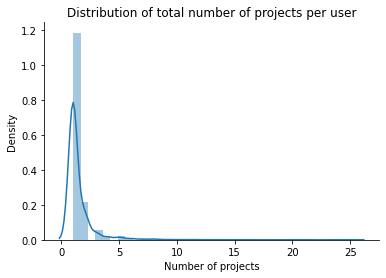

In [140]:
sns.distplot(a=data['project_id'])
sns.despine()
plt.title("Distribution of total number of projects per user")
plt.xlabel("Number of projects")

/home/xqua/anaconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Number of needs')

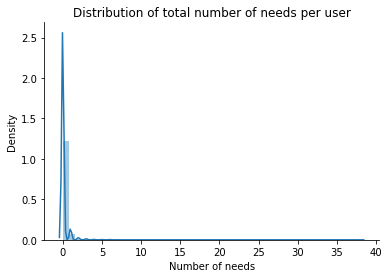

In [143]:
sns.distplot(a=df_users['needs_count'])
sns.despine()
plt.title("Distribution of total number of needs per user")
plt.xlabel("Number of needs")

## Creating the User network 
Now we are going to create the bi-partite network of user-project. We can expect this network to be pretty sparse with many disconnected components. 

To do this, we will use NetworkX to create two node types, and link them based on the `df_members` table. Then we will apply a BiPartite projection, what this means is that we will connect two users with an edge, if they both share one project in common. 

In [202]:
import networkx as nx

In [203]:
G = nx.Graph() # First we create an empty Graph to hold the data

In [204]:
# Because out data is in a pandas format, we can use the apply function, which allows us to define 
# some nice functions to help organize it all.

def create_network(row):
    # If the node doesn't exist we create it
    if row['user_id'] not in G.nodes():
        G.add_node("user_{}".format(row['user_id']), node_type="user")
    if row['project_id'] not in G.nodes():
        G.add_node("project_{}".format(row['project_id']), node_type="project")
    # Then we add a link between the user and the project
    G.add_edge("project_{}".format(row['project_id']), "user_{}".format(row['user_id']))

In [205]:
# Progress_apply is a nice helper function that is givent by TQDM. 
# It allows to run an apply function and have a nice progress bar
results = df_members.progress_apply(create_network, axis=1) # Also, we use axis=1
# which means that we will send each row of the table to the apply function

  0%|          | 0/2182 [00:00<?, ?it/s]

In [206]:
# Here we select both types of nodes and store them in a list for further use
projects = [n for n in G.nodes if G.nodes[n]['node_type'] == 'project']
users = [n for n in G.nodes if G.nodes[n]['node_type'] == 'user']

In [207]:
# This function will sort the nodes left and right, based on a set of nodes of Type 1, and will put Type 2 nodes on 
# the other side. 
positions = nx.bipartite_layout(G, projects) 

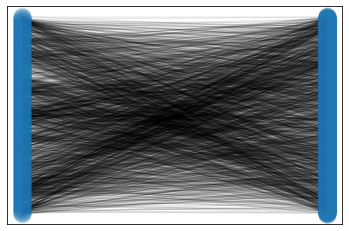

In [208]:
# Finally we draw the bipartite network
nx.drawing.draw_networkx(G, pos=positions, with_labels=False, alpha=0.1)

In [176]:
# Now we do the projection! Networkx asks you for the group of node you'd like the projection to be run on
# Here we want the user network, so we ask it to project onto the users group that we defined above
user_projection_G = nx.algorithms.bipartite.projection.projected_graph(G, users)

In [183]:
# Then we generate a layout
positions = nx.drawing.layout.spring_layout(user_projection_G, k=0.5)

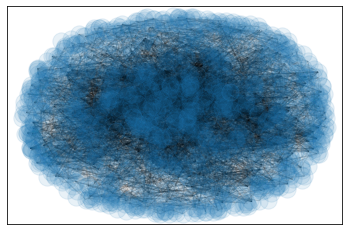

In [184]:
# And plot the resulting graph
nx.drawing.draw_networkx(user_projection_G, pos=positions, with_labels=False, alpha=0.1)

## Conclusion
The projection is too dense to see anything, and further filtering would be needed to analyze this network. However, this is beyond the scope of this class.

Have fun scrapping the web!